# Predictiong heart disease using ML

This notebook looks into using various Python based ML and data science libraries in an attempt to build a ML model capable of predicting wether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem deffinition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## Problem deffinition

In a statement,
> Given clinical params about a patient, can we predict wether or not they have heart disease?

## Data

Using UCI heart-disease data from keaggle (preformatted to csv):
https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset/data
* The original data came from cleavland data from UCI ML repository.

## Evaluation

> If you can reach 95% accuracy of the ML model (target 1 or 0) during the proof of concept, we'll pursue the project.

## Features

This is where you'll get different information about each of the features in your data.

**Create data dictionary**

1. **age** - age in years

2. **sex** (1 = male; 0 = femal)

3. **cp** - chest pain type
    - 0: Typical angina: chest pain related decrease blood supply to the heart
    - 1: Atypical angina: chest pain not related to heart
    - 2: Non-anginal pain: typically esophageal spasms (non heart related)
    - 3: Asymptomatic: chest pain not showing signs ofdisease

4. **trestbps** - resting blood pressure (in mm Hg on admission to the hospital)
    - anything above 130-140 is typically cause or concern

5. **chol** - serum cholestoral in mg/dl
    - serum = LDL + HDL + 2 * triglycerides
    - above 200 is case for concern

6. **fbs** - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    - '>126' mg/d signals diabetes

7. **restecg** - resting electrocardiographic results
    - 0: Nothing to note
    - 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    - 2: Possible or definite left ventricular hypertrophy
        - Enlarged hert's main pumping chamber

8. **thalach** -maximum heart rate achieved

9. **exang** - exercise inuced angina (1 = yes; 0 = no)

10. **oldpeak** - ST depression induced by exercise relative to rest
    - looks at stress of heart during exercise;unhealthy heart will stress more

11. **slope** - the slope of the peak exercise ST segment
    - 0: Upsloping: better heart rate with exercise (uncommon)
    - 1: Flatsloping: minimal change (typical healthy heart)
    - 2:Downsloping: signs of unhealthy heart

12. **ca** - number of major vessels (0-3) colored by fluoroscopy
    - colored vessel means the doctor can see the blood passing through
    - themore blood movement the better (no clots)

13. **thal** - thalium stress result
    - 3: normal
    - 6: fixed defect: used to be defect but ok now
    - 7: reversible dfect: no proper blood movement when exercising

14. **target** - have diseaseor not (1=yes, 0=no) (= the predicted attribute)


In [1]:
# Import all the tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import RocCurveDisplay, confusion_matrix, classification_report, precision_score, recall_score, f1_score

In [2]:
# import data
df = pd.read_csv("heart-disease.csv")
df.drop(columns=df.columns[0], axis=1, inplace=True)

## Data exploration (exploratory data analysis or EDA)

The goal here is to find more about the data and become a subject matter expert on the dataset you're working with.

1. What questions are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. Whats missing from the data and how do we deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more abou of your data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,female,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3,no
299,45,male,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3,no
300,68,male,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3,no
301,57,male,0,NaN,131.0,0,1,115.0,1,1.2,1,1,3,no
302,57,female,1,130.0,236.0,0,0,174.0,0,0.0,1,1,2,no


In [5]:
df["target"].value_counts() #rekatively balanced problem

target
yes    165
no     138
Name: count, dtype: int64

<Axes: xlabel='Has heart disease', ylabel='num of records'>

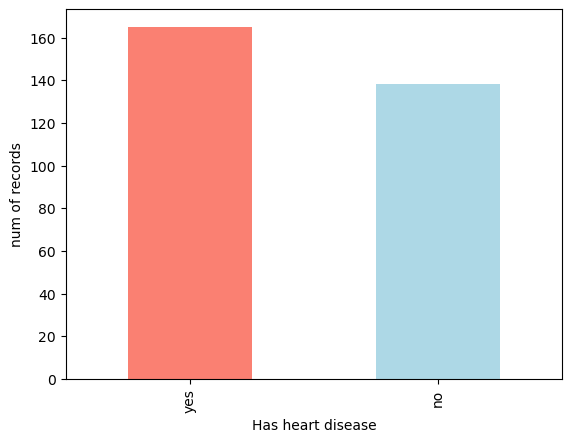

In [6]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"], xlabel="Has heart disease", ylabel="num of records")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    int64  
 3   trestbps  299 non-null    float64
 4   chol      302 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   298 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    object 
dtypes: float64(4), int64(8), object(2)
memory usage: 33.3+ KB


In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    4
chol        1
fbs         0
restecg     0
thalach     5
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,299.000000,302.000000,303.000000,303.000000,298.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.966997,131.712375,246.317881,0.148515,0.528053,149.865772,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,1.032052,17.629032,51.908285,0.356198,0.525860,22.563687,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,134.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


### Heart disease Frequency according to sex

In [10]:
df.sex.value_counts()

sex
male      207
female     96
Name: count, dtype: int64

In [11]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,female,male
target,,
no,24,114
yes,72,93


(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

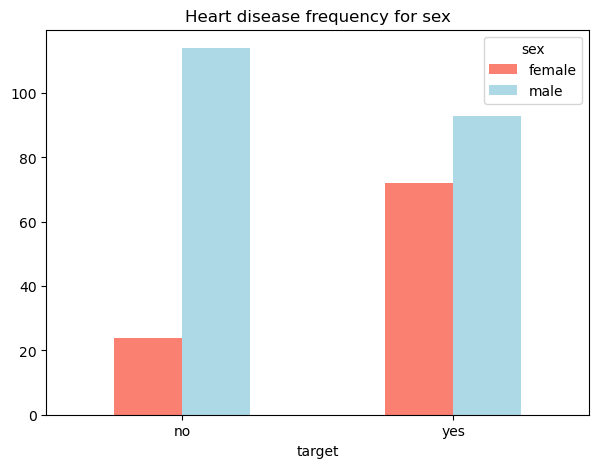

In [12]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(7, 5),
                                    color=["salmon", "lightblue"])
plt.title("Heart disease frequency for sex")
plt.xticks(rotation=0)

### Age vs Max heart rate for heart disease

In [13]:
# convert target to int
df['target'] = df['target'].replace("yes", 1)
df['target'] = df['target'].replace("no", 0)

C:\Users\Luka\AppData\Local\Temp\ipykernel_14204\507237324.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['target'] = df['target'].replace("no", 0)


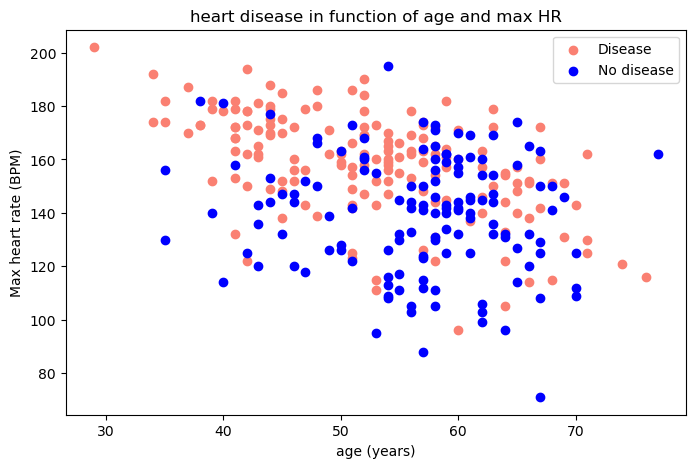

In [14]:
plt.figure(figsize=(8, 5))

#scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

# Scatter with neg examples 
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="blue")

# add some helpful info
plt.title("heart disease in function of age and max HR")
plt.xlabel("age (years)")
plt.ylabel("Max heart rate (BPM)")
plt.legend(["Disease", "No disease"]);

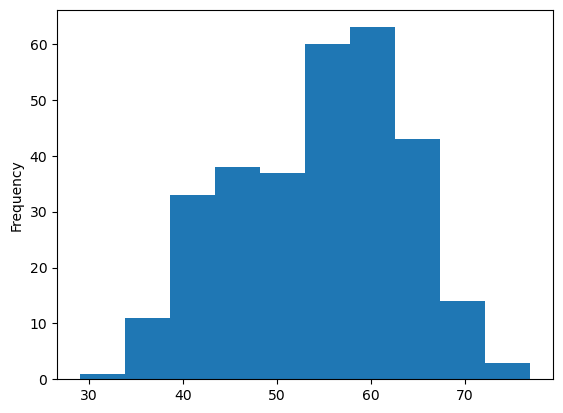

In [15]:
# Check distribution of age column with a histogram
df.age.plot.hist();

# Heart disease frequency per Chest pain type

3. **cp** - chest pain type
    - 0: Typical angina: chest pain related decrease blood supply to the heart
    - 1: Atypical angina: chest pain not related to heart
    - 2: Non-anginal pain: typically esophageal spasms (non heart related)
    - 3: Asymptomatic: chest pain not showing signs ofdisease

In [16]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


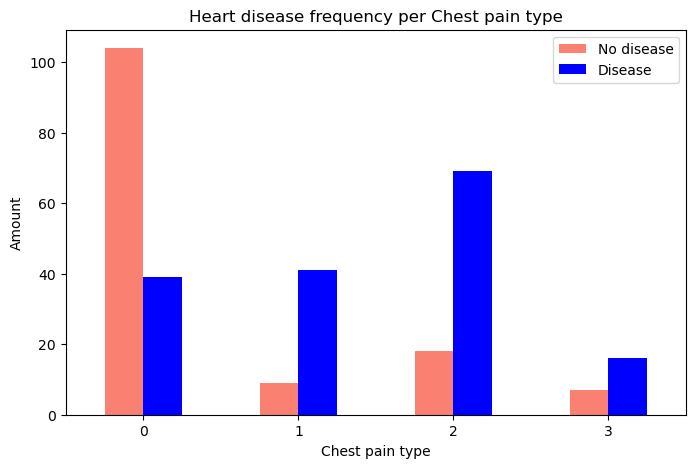

In [17]:
# make crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(8, 5),
                                   color=["salmon", "blue"])
# Add some communication
plt.title("Heart disease frequency per Chest pain type")
plt.xlabel("Chest pain type")
plt.ylabel("Amount")
plt.legend(["No disease", "Disease"])
plt.xticks(rotation=0);

In [18]:
# replaced sex string with values
df["sex"] = df["sex"].replace({"male" : 1, "female" :0})
df.head()

C:\Users\Luka\AppData\Local\Temp\ipykernel_14204\4032837646.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["sex"] = df["sex"].replace({"male" : 1, "female" :0})


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1
4,57,0,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,1


In [19]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279570,0.213465,0.121308,-0.116211,-0.396302,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.064347,-0.197387,0.045032,-0.058196,-0.051491,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.048142,-0.078008,0.094444,0.044421,0.301567,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279570,-0.064347,0.048142,1.000000,0.127278,0.175885,-0.110966,-0.029729,0.070183,0.193827,-0.121380,0.098499,0.060437,-0.142035
chol,0.213465,-0.197387,-0.078008,0.127278,1.000000,0.012865,-0.150330,-0.022939,0.066362,0.053098,-0.003027,0.070807,0.098328,-0.086563
fbs,0.121308,0.045032,0.094444,0.175885,0.012865,1.000000,-0.084189,0.001599,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.110966,-0.150330,-0.084189,1.000000,0.037393,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.396302,-0.051491,0.301567,-0.029729,-0.022939,0.001599,0.037393,1.000000,-0.396211,-0.346806,0.380764,-0.208967,-0.106621,0.413252
exang,0.096801,0.141664,-0.394280,0.070183,0.066362,0.025665,-0.070733,-0.396211,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193827,0.053098,0.005747,-0.058770,-0.346806,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


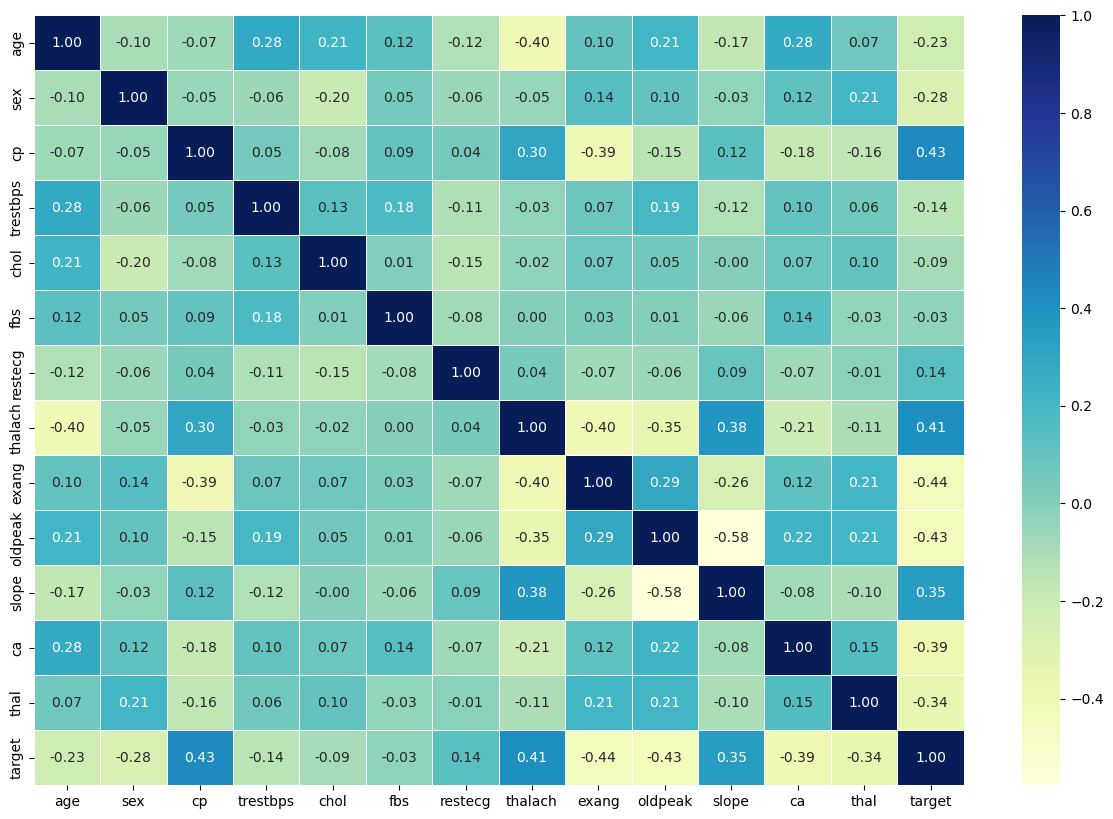

In [20]:
# Lets make our correlation matrix a little prittier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

## Modelling

In [21]:
df = df.dropna(axis='rows')

In [22]:
# split data in x and y
X = df.drop("target", axis=1)
y = df["target"]

np.random.seed(42)
# Split to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
# Its time to build ML model
# What model should we use -> look at the sklearn map

# Put models into dictionary
models = {"Logistic Regression" : LogisticRegression(),
          "KNN" : KNeighborsClassifier(),
          "Random Forest" : RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fit and evaluate given ML models.
    Models : a dict of different sklearn models
    """
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)

    return model_scores   

In [24]:
scores = fit_and_score(models, X_train, X_test, y_train, y_test)
scores

C:\ProgramData\miniconda3\envs\env2\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7966101694915254,
 'KNN': 0.6101694915254238,
 'Random Forest': 0.8305084745762712}

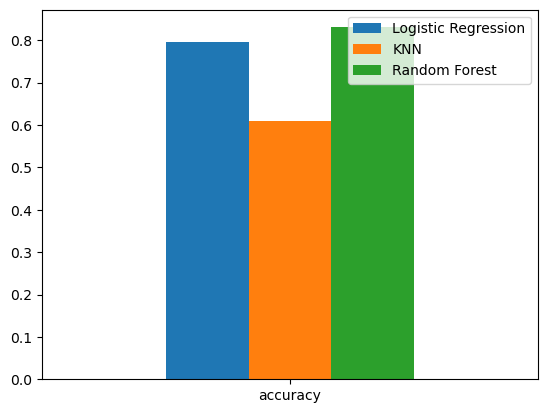

In [25]:
# compare models
model_compare = pd.DataFrame(scores, index=["accuracy"])
model_compare.plot(kind="bar")
plt.xticks(rotation=0);

#### We can see RandomForest has best accuracy

## How can we improve the model?

1. Hyperparameter tuning
2. Feature importance
3. Confusion matrix
4. Cross-validation
5. Precision, Recalll, F1 score
6. Classification report
7. ROC curve
8. AUC

In [26]:
# Hyperparam tuning for KNN
train_scores = []
test_scores = []

# create a list of different values for n_neighbors
neighbors = range(1, 21)

# set up KNN instance
knn = KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [27]:
train_scores

[1.0,
 0.7863247863247863,
 0.7564102564102564,
 0.7393162393162394,
 0.7606837606837606,
 0.7478632478632479,
 0.7478632478632479,
 0.7393162393162394,
 0.7393162393162394,
 0.7008547008547008,
 0.7136752136752137,
 0.6923076923076923,
 0.6709401709401709,
 0.6837606837606838,
 0.6709401709401709,
 0.6752136752136753,
 0.6794871794871795,
 0.6666666666666666,
 0.6709401709401709,
 0.6709401709401709]

In [28]:
test_scores

[0.6271186440677966,
 0.576271186440678,
 0.6440677966101694,
 0.6440677966101694,
 0.6101694915254238,
 0.6610169491525424,
 0.6779661016949152,
 0.6440677966101694,
 0.6440677966101694,
 0.6610169491525424,
 0.7288135593220338,
 0.6779661016949152,
 0.6949152542372882,
 0.711864406779661,
 0.711864406779661,
 0.711864406779661,
 0.6949152542372882,
 0.711864406779661,
 0.7288135593220338,
 0.7288135593220338]

max KNN score on test data: 72.88%


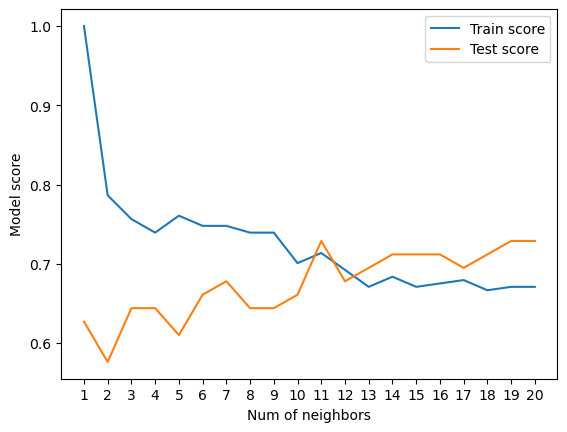

In [29]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xlabel("Num of neighbors")
plt.ylabel("Model score")
plt.xticks(np.arange(1, 21, 1))
plt.legend()
print(f"max KNN score on test data: {max(test_scores)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV

In [30]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [31]:
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [32]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [33]:
rs_log_reg.score(X_test, y_test)

0.8135593220338984

In [34]:
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [35]:
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [36]:
rs_rf.score(X_test, y_test)

0.8305084745762712

In [37]:
np.random.seed(42)

gf_grid = {"n_estimators": np.arange(400, 800, 100),
           "max_depth": [None, 3],
           "min_samples_split": np.arange(10, 20, 3),
           "min_samples_leaf": np.arange(1, 5, 2)}

# Setup random hyperparameter search for RandomForestClassifier
gs_rf = GridSearchCV(RandomForestClassifier(), 
                           param_grid=gf_grid,
                           cv=5,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
gs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 3],
                         'min_samples_leaf': array([1, 3]),
                         'min_samples_split': array([10, 13, 16, 19]),
                         'n_estimators': array([400, 500, 600, 700])},
             verbose=True)

In [38]:
gs_rf.best_params_

{'max_depth': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 19,
 'n_estimators': 600}

In [39]:
gs_rf.score(X_test, y_test)

0.8135593220338984

## Evaluating ML classifier, beyond accuracy

* ROC curve and AUC
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

... it would be great if cross-validation was used where possible.

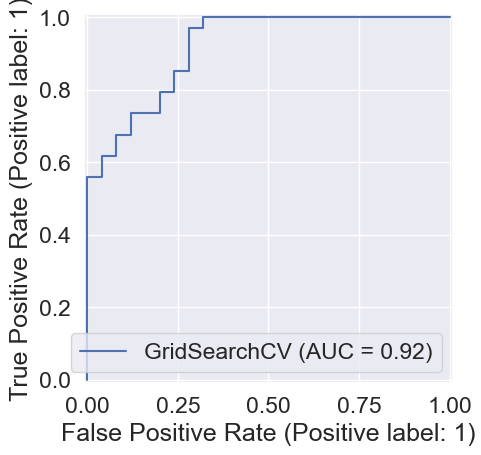

In [60]:
y_preds = gs_rf.predict(X_test)

# ROC curve and AUC
RocCurveDisplay.from_estimator(gs_rf, X_test, y_test);

In [61]:
# confusion metrix
print(confusion_matrix(y_test, y_preds))

[[14 11]
 [ 0 34]]


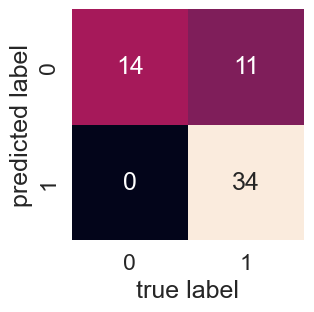

In [62]:
# improve confusion matrix with sns

sns.set(font_scale=1.5)
def plot_conf_mat(y_test, y_preds):
    """
    Ploting confusion matrix using seaborn heatmap
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot = True,
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
plot_conf_mat(y_test, y_preds);

In [64]:
print(classification_report(y_test, y_preds)) ## only done on one set of test data

              precision    recall  f1-score   support

           0       1.00      0.56      0.72        25
           1       0.76      1.00      0.86        34

    accuracy                           0.81        59
   macro avg       0.88      0.78      0.79        59
weighted avg       0.86      0.81      0.80        59



In [65]:
# CS 5 fold evaluation metrics

gs_rf.best_params_

{'max_depth': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 19,
 'n_estimators': 600}

In [66]:
# create a new classifier with best params

clf = RandomForestClassifier(n_estimators=600,
                             min_samples_leaf=3,
                             min_samples_split=19,
                             max_depth=3)

In [69]:
# CV accuracy
cv_acc = np.mean(cross_val_score(clf, X, y, cv=5, scoring="accuracy"))
# CV precision
cv_pre = np.mean(cross_val_score(clf, X, y, cv=5, scoring="precision"))
# CV recall
cv_rec = np.mean(cross_val_score(clf, X, y, cv=5, scoring="recall"))
# CV f1-score
cv_f1 = np.mean(cross_val_score(clf, X, y, cv=5, scoring="f1"))

print(f"Accuracy score CV: {cv_acc*100:.2f} %")
print(f"Precision score CV: {cv_pre*100:.2f} %") 
print(f"Recall score CV: {cv_rec*100:.2f} %") 
print(f"F1 score CV: {cv_f1*100:.2f} %")

Accuracy score CV: 83.61 %
Precision score CV: 82.05 %
Recall score CV: 88.75 %
F1 score CV: 86.21 %


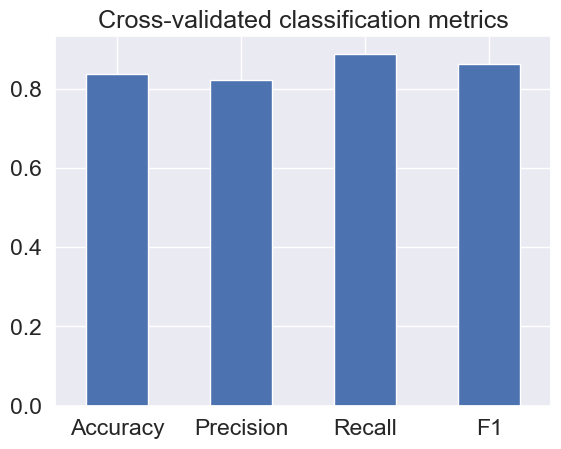

In [73]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_pre,
                          "Recall": cv_rec,
                          "F1": cv_f1}, index=[0])
cv_metrics.T.plot.bar(title="Cross-validated classification metrics", legend=False)
plt.xticks(rotation=0);

### Feature importance

Feature importance is another way of asking, "which features contributed most to the importance of the model and how did they contribute?"

Finding feature importance is different for each ML model.

In [75]:
clf = RandomForestClassifier(n_estimators=600,
                             min_samples_leaf=3,
                             min_samples_split=19,
                             max_depth=3)
clf.fit(X_train, y_train)
clf.feature_importances_

array([0.02667569, 0.01787201, 0.1907114 , 0.01768895, 0.01743729,
       0.00192799, 0.00532203, 0.11246299, 0.13688312, 0.12873713,
       0.05810748, 0.13989127, 0.14628266])

In [76]:
# Match the coefficients of features to columns
feature_dict = dict(zip(df.columns, list(clf.feature_importances_)))
feature_dict

{'age': 0.026675688506099884,
 'sex': 0.017872011620093834,
 'cp': 0.1907114049699074,
 'trestbps': 0.017688949833014396,
 'chol': 0.017437286324413104,
 'fbs': 0.001927986806163606,
 'restecg': 0.005322028111229547,
 'thalach': 0.11246298554266076,
 'exang': 0.13688312073658462,
 'oldpeak': 0.12873712694774503,
 'slope': 0.058107480862753406,
 'ca': 0.1398912667101681,
 'thal': 0.14628266302916626}

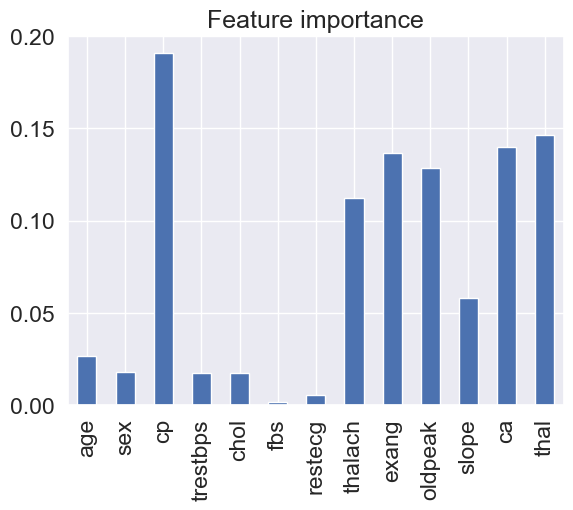

In [83]:
# visiolize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature importance", legend=False);

In [93]:
X = X.drop(["fbs", "restecg", "chol", "trestbps"], axis=1)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8135593220338984

## Experimentation

* Was done through out this notebook
* We didn't hit the desired accuracy of 95% (we got to 81%)
* We could improve data or collect more, improve model fitting or model (like CatBoost or XGBoost)...